<a href="https://colab.research.google.com/github/eyecrack/DL-Repo/blob/master/fastai_flower_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
root_dir + ''

'/content/gdrive/My Drive/'

In [0]:
# Downloand unzip images
!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!unzip -qq flower_data.zip

In [7]:
# copied image labesl into colab to avoid frequent download at every instance
!cp fl_label.csv gdrive/'My Drive'/'Colab Notebooks'/flower_data


cp: cannot stat 'fl_label.csv': No such file or directory


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai
import matplotlib.pyplot as plt
import os
import csv

In [10]:
! git clone https://gitlab.com/bidehassan/dl-data-repo.git

Cloning into 'dl-data-repo'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0)
Unpacking objects: 100% (9/9), done.


In [0]:
path = Path('/content/gdrive/My Drive/flower_data')
train_img = path/'train'
valid_img = path/'valid'
label_img = pd.read_csv('/content/gdrive/My Drive/flower_data/fl_label.csv')
labeling = 'fl_label.csv'
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [12]:
train_img.ls()

[PosixPath('/content/gdrive/My Drive/flower_data/train/cautleya spicata'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/bougainvillea'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/orange dahlia'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/bee balm'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/osteospermum'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/common dandelion'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/bearded iris'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/gaura'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/garden phlox'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/alpine sea holly'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/blackberry lily'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/windflower'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/bishop of llandaff'),
 PosixPath('/content/gdrive/My Drive/flower_data/train/petunia'),
 

In [0]:
# show all classes of images
classes = list(label_img['name'])

In [0]:
#Rename each classes of images in train directory to the categories they belong
for old, new in zip(label_img['label'], label_img['name']):
    if os.path.exists('flower_data/train'):
        try:
            os.renames(train_img/str(old), train_img/new)
        except:
            pass
    else:
        print("such directory do not exist")

In [0]:
# Verify if labels signifies exact images

for c in classes:
    print(c)
    verify_images(train_img/c, delete=True, max_size=500)

In [16]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=train_img, valid_pct=0.2, classes=classes,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
83, 96, 100, 86, 56...
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
45, 83, 19, 53, 72...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [0]:
!cp /content/dl-data-repo/fl_label.csv /content/flower_data

In [18]:
'''data = ImageDataBunch.from_csv(path, folder= train_img, csv_labels=labeling,
                               valid_pct=0.2, 
                               ds_tfms=get_transforms(), size=224, 
                               num_workers=4).normalize(imagenet_stats)'''

'data = ImageDataBunch.from_csv(path, folder= train_img, csv_labels=labeling,\n                               valid_pct=0.2, \n                               ds_tfms=get_transforms(), size=224, \n                               num_workers=4).normalize(imagenet_stats)'

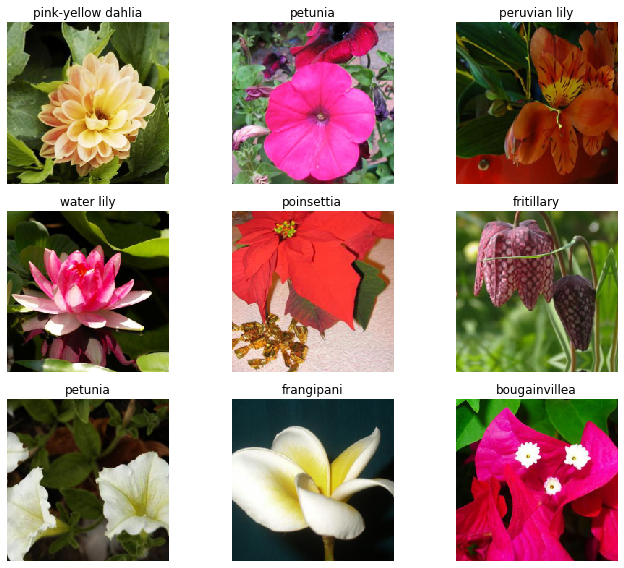

In [19]:
#display images and labels
data.show_batch(rows=3, figsize=(10,8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['pink primrose',
  'hard-leaved pocket orchid',
  'canterbury bells',
  'sweet pea',
  'english marigold',
  'tiger lily',
  'moon orchid',
  'bird of paradise',
  'monkshood',
  'globe thistle',
  'snapdragon',
  "colt's foot",
  'king protea',
  'spear thistle',
  'yellow iris',
  'globe-flower',
  'purple coneflower',
  'peruvian lily',
  'balloon flower',
  'giant white arum lily',
  'fire lily',
  'pincushion flower',
  'fritillary',
  'red ginger',
  'grape hyacinth',
  'corn poppy',
  'prince of wales feathers',
  'stemless gentian',
  'artichoke',
  'sweet william',
  'carnation',
  'garden phlox',
  'love in the mist',
  'mexican aster',
  'alpine sea holly',
  'ruby-lipped cattleya',
  'cape flower',
  'great masterwort',
  'siam tulip',
  'lenten rose',
  'barbeton daisy',
  'daffodil',
  'sword lily',
  'poinsettia',
  'bolero deep blue',
  'wallflower',
  'marigold',
  'buttercup',
  'oxeye daisy',
  'common dandelion',
  'petunia',
  'wild pansy',
  'primula',
  'sunflo

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.043090,0.457969,0.123743,01:18
1,0.777177,0.256113,0.071926,01:18
2,0.355154,0.185308,0.050271,01:18
3,0.199932,0.170901,0.047951,01:18


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


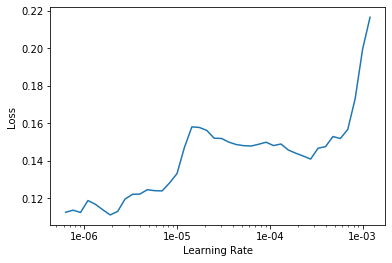

In [27]:
learn.recorder.plot()

In [41]:

learn.fit_one_cycle(8, max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.137972,0.158860,0.955916,01:23
1,0.129799,0.151514,0.952823,01:22
2,0.136052,0.161855,0.952049,01:21
3,0.115710,0.142990,0.959010,01:20
4,0.090431,0.128654,0.959783,01:18
5,0.071694,0.126894,0.961330,01:18
6,0.047947,0.121615,0.964424,01:17
7,0.045994,0.118293,0.962104,01:17


In [0]:
learn.save('stage-2')

In [0]:
'''def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()
    
    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    assert(lr_diff < len(losses))
    loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs
    
    #Search for index in gradients where loss is lowest before the loss spike
    #Initialize right and left idx using the lr_diff as a spacing unit
    #Set the local min lr as -1 to signify if threshold is too low
    r_idx = -1
    l_idx = r_idx - lr_diff
    while (l_idx >= -len(losses)) and (abs(loss_grad[r_idx] - loss_grad[l_idx]) > loss_threshold):
        local_min_lr = lrs[l_idx]
        r_idx -= 1
        l_idx -= 1

    lr_to_use = local_min_lr * adjust_value
    
    if plot:
        # plots the gradients of the losses in respect to the learning rate change
        plt.plot(loss_grad)
        plt.plot(len(losses)+l_idx, loss_grad[l_idx],markersize=10,marker='o',color='red')
        plt.ylabel("Loss")
        plt.xlabel("Index of LRs")
        plt.show()

        plt.plot(np.log10(lrs), losses)
        plt.ylabel("Loss")
        plt.xlabel("Log 10 Transform of Learning Rate")
        loss_coord = np.interp(np.log10(lr_to_use), np.log10(lrs), losses)
        plt.plot(np.log10(lr_to_use), loss_coord, markersize=10,marker='o',color='red')
        plt.show()
        
    return lr_to_use

find_appropriate_lr(model = learn, lr_diff = 15, loss_threshold = .05, adjust_value = 1, plot = False)'''

In [0]:
learn.save('stage-2')

In [0]:
learn.recorder.plot()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

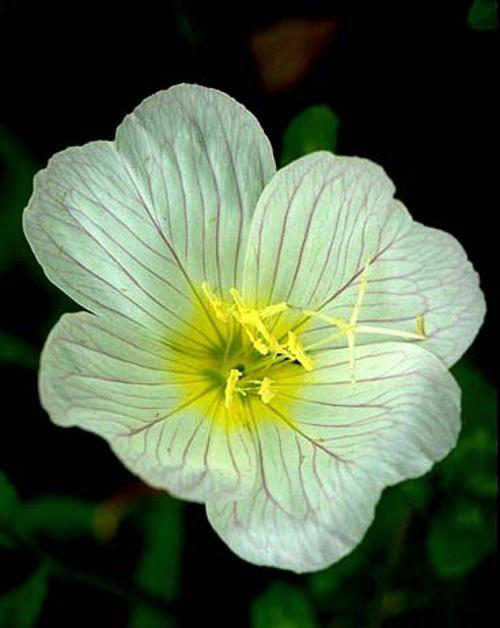

In [42]:
img = open_image('/content/gdrive/My Drive/flower_data/valid/1/image_06739.jpg')
img

In [43]:
learn = load_learner(path)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute 

In [45]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_idx

tensor(0)

In [0]:
learn.load('stage-1');

In [0]:
'''data1 = (ImageList.from_csv(path, folder='train', csv_name='fl_label.csv', cols='label')
           .use_partial_data(sample_pct = .1, seed= 34)
           .random_split_by_pct(valid_pct=0.2, seed=34)
           .label_from_df(cols={your_label_cols_name})
           .transform(tfms, size = 96)
           .databunch(bs=64)).normalize(imagenet_stats)'''

In [47]:
!ls

data  dl-data-repo  flower_data  flower_data.zip  gdrive  models
